<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [3]:
#reading in the CSV
import pandas as pd
df = pd.read_csv('https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip', compression = 'zip', skiprows = 1, skipfooter = 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [4]:
#making sure I did it right for this data set
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

In [6]:
#lets take a look at the missing data
pd.options.display.max_rows=999
pd.options.display.max_columns=100
df.isnull().sum().sort_values(ascending = False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128283
hardship_type                                 128276
hardship_last_payment_amount                  128276
hardship_payoff_balance_amount                128276
hardship_reason                               128276
hardship_loan_status                          128276
hardship_dpd                                  128276
hardship_length                               128276
payment_plan_start_date                       128276
hardship_end_date                             128276
hardship_start_date                           128276
hardship_amount                               128276
deferral_term                                 128276
hardship_status                               128276
settlement_percentage                         

In [7]:
#column that shouldn't be a string.
df['int_rate'].head()

0     14.47%
1     22.35%
2     23.40%
3     18.94%
4     10.72%
Name: int_rate, dtype: object

In [8]:
#what is the datatype of the column
df['int_rate'].dtype

dtype('O')

In [9]:
#what is the value of the first cell in this column
int_rate0 = df.loc[0, 'int_rate']
print(int_rate0)
int_rate0

 14.47%


' 14.47%'

In [10]:
#stripping the leading space and the percentage
int_rate0.strip().strip('%')

'14.47'

In [11]:
#converting to float
float(int_rate0.strip().strip('%'))

14.47

In [12]:
#confirming that will confirt from str to float
print(type(int_rate0.strip().strip('%')))
print(type(float(int_rate0.strip().strip('%'))))

<class 'str'>
<class 'float'>


In [0]:
#lets make this a function
def int_rate_2_float(mystring):
  return float(mystring.strip().strip('%'))

In [14]:
#Applying it to the whole column
df['int_rate_float'] = df['int_rate'].apply(int_rate_2_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float'],
      dtype='object', length=145)

In [15]:
df[['int_rate', 'int_rate_float']].head()

,int_rate,int_rate_float
0,14.47%,14.47
1,22.35%,22.35
2,23.40%,23.40
3,18.94%,18.94
4,10.72%,10.72


In [16]:
#exploring the emp_tilte column
df[['emp_title', 'int_rate']].sample(6)

,emp_title,int_rate
21794,driver operator,24.37%
108796,NaN,8.46%
9132,Installer,8.81%
86442,senior operation associate,7.21%
70087,Service manager,11.80%
10525,Wind turbine technician,13.56%


In [17]:
#how many unique possible titles?
df['emp_title'].nunique()

43892

In [18]:
#most popular titles
df['emp_title'].value_counts(ascending=False, dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [19]:
#hella nulls
df['emp_title'].isnull().sum()

20947

In [20]:
#how many are not null
df['emp_title'].notnull().sum()

107465

In [21]:
#Lets start cleaning it up
import numpy as np

def clean_title(title):
  if isinstance(title, str):
    return title.strip().title() #note to self .title() method
  else:
    return 'Unkown'

#examples for testing this function
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

for item in examples:
  print(clean_title(item))

Owner
Supervisor
Project Manager
Unkown


In [22]:
#function appears to be working, lets apply it to the entire column
df['emp_title_clean'] = df['emp_title'].apply(clean_title)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'emp_title_clean'],
      dtype='object', length=146)

In [23]:
#compare old and new values
df[['emp_title', 'emp_title_clean']].sample(6)

,emp_title,emp_title_clean
83286,Assistant property manager,Assistant Property Manager
120340,CAD Technician and designer,Cad Technician And Designer
111014,Warehouse Manager,Warehouse Manager
110566,Assistant,Assistant
112969,Sous Chef,Sous Chef
47280,Custom production manager,Custom Production Manager


In [24]:
#lets check if there are any missing
df['emp_title_clean'].isnull().sum()

0

In [25]:
#lets check the value counts
df['emp_title_clean'].value_counts(ascending=False).head()

Unkown              20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Name: emp_title_clean, dtype: int64

In [26]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'emp_title_clean', 'emp_title_manager'],
      dtype='object', length=147)

In [27]:
#alright lets compart the clean title and the manager title
df[['emp_title_clean', 'emp_title_manager']].sample(4)

,emp_title_clean,emp_title_manager
121053,Vice President Operations,False
118085,Unkown,NaN
117572,Manager,True
104207,Leadman,False


In [28]:
#okay looks like there is some nan values, but it seems to be correlated to the unkown.  Is this expected? Earmark to ask TL
df['emp_title_manager'].isnull().sum()

20947

In [29]:
#do we have any dates in our df?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 147 entries, id to emp_title_manager
dtypes: float64(58), int64(51), object(38)
memory usage: 144.0+ MB


In [30]:
#lets do it like a pro, and use that list comprehension
[col for col in df.columns if (col.endswith('_d')) or (col.endswith('_date'))]

['issue_d',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'debt_settlement_flag_date',
 'settlement_date']

In [31]:
#what is the data type
df['issue_d'].dtype

dtype('O')

In [32]:
#but sure looks like a date
df.loc[0:10, 'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [33]:
df['issue_d_clean'] = pd.to_datetime(df['issue_d'], infer_datetime_format = True)

#compare the old and new
df[['issue_d', 'issue_d_clean']].head()

,issue_d,issue_d_clean
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [34]:
#checking the data type
df['issue_d_clean'].dtype

dtype('<M8[ns]')

In [35]:
#lets create a few new values
df['year'] = df['issue_d_clean'].dt.year

df[['issue_d_clean', 'year']].sample(6)

,issue_d_clean,year
59536,2018-11-01,2018
111563,2018-10-01,2018
44501,2018-11-01,2018
118421,2018-10-01,2018
126058,2018-10-01,2018
18704,2018-12-01,2018


In [36]:
#some more
df['month'] = df['issue_d_clean'].dt.month

#compare
df[['issue_d_clean', 'year']].sample(6)

,issue_d_clean,year
53412,2018-11-01,2018
23649,2018-12-01,2018
28912,2018-12-01,2018
15380,2018-12-01,2018
62519,2018-11-01,2018
42373,2018-11-01,2018


In [37]:
#dj khalid
df['weekday'] = df['issue_d_clean'].dt.month

#compare
df[['issue_d_clean', 'weekday']].sample(6)

,issue_d_clean,weekday
2823,2018-12-01,12
95193,2018-10-01,10
33230,2018-12-01,12
76814,2018-11-01,11
54365,2018-11-01,11
50014,2018-11-01,11


In [38]:
#lets filter on some bools
condition = df['emp_title_manager'] == True

managers = df[condition]
managers.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
9,NaN,NaN,10450,10450,10450.0,36 months,18.94%,382.74,D,D2,Project Manager,10+ years,MORTGAGE,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,371xx,TN,27.38,0,Jul-2007,0,NaN,NaN,11,0,34628,87%,24,w,8361.33,8361.33,3439.170000,3439.17,2088.67,1350.50,0.0,0.0,0.0,Oct-2019,382.74,Nov-2019,Oct-2019,0,...,0,1,100.0,100.0,0,0,429450,41288,11800,17500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,Project Manager,True,2018-12-01,2018,12,12
27,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,Production Manager,True,2018-12-01,2018,12,12
40,NaN,NaN,12000,12000,12000.0,36 months,16.14%,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9555.15,9555.15,3788.340000,3788.34,2444.85,1343.49,0.0,0.0,0.0,Oct-2019,422.72,Nov-2019,Oct-2019,0,...,0,2,100.0,66.7,0,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,Sales Account Manager,True,2018-12-01,2018,12,12
42,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,0.0,Apr-2019,34712.60,NaN,Oct-2019,0,...,0,1,97.4,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,Sr. Vice President -Risk Manager,True,2018-12-01,2018,12,12
46,NaN,NaN,20400,20400,20400.0,60 months,10.33%,436.76,B,B1,Bakery Manager,10+ years,MORTGAGE,140000.0,Not 

In [39]:
#this doesn't make the most sense to me.  What does condition look like?
condition.head()

0    False
1    False
2    False
3    False
4    False
Name: emp_title_manager, dtype: bool

In [0]:
#okay that is what I expected condition to look like. Basically a single column dataframe titled emp_title_manager
#so when I do managers = df[condition] I'm replacing the original column with the new column

In [41]:
managers['emp_title_manager'].isnull().sum()

0

In [42]:
#got it, I understand now.
df['emp_title_manager'].isnull().sum()

20947

In [43]:
#lets do two filters at once
subordinates = df[(df['emp_title_manager'] == False) & (df['home_ownership']=='OWN')]

subordinates.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
24,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.24,1891.17,0.0,0.0,0.0,Apr-2019,903.73,NaN,Oct-2019,0,...,0,1,100.0,14.3,1,0,138354,104590,36400,90854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,26.31,Casino Host,False,2018-12-01,2018,12,12
41,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,928.18,928.18,431.90,431.90,271.82,160.08,0.0,0.0,0.0,Oct-2019,43.37,Nov-2019,Oct-2019,0,...,0,3,100.0,66.7,0,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,Haz Mat S/R,False,2018-12-01,2018,12,12
47,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15280.46,15280.46,6792.87,6792.87,4719.54,2073.33,0.0,0.0,0.0,Oct-2019,688.13,Nov-2019,Oct-2019,0,...,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Bus Driver,False,2018-12-01,2018,12,12
65,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.05,5848.05,3024.11,2823.94,0.0,0.0,0.0,Oct-2019,587.82,Nov-2019,Oct-2019,0,...,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Teacher,False,2018-12-01,2018,12,12
88,NaN,NaN,9600,9600,9600.0,36 months,15.02%,332.89,C,C3,Fuel truck driver,10+ years,OWN,60000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,087xx,NJ,32.64,1,Oct-2007,1,17.0,NaN,14,0,16424,73%,32,w,7351.05,7351.05,3316.88,3316.88,2

In [44]:
print(managers['int_rate_float'].mean())
print(subordinates['int_rate_float'].mean())

12.65385304150059
13.25087361419105


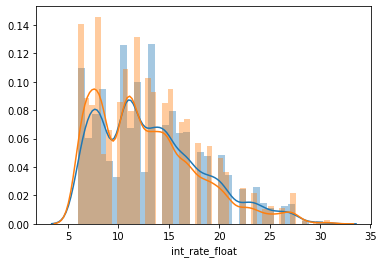

In [45]:
#plot it out
import seaborn as sns
sns.distplot(subordinates['int_rate_float'])
sns.distplot(managers['int_rate_float'])

In [46]:
#okay convert term column from string to int
print(df['term'].dtype)
df['term'].head()

object


0     36 months
1     36 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [47]:
#okay its an object, lets see whats up with that object
dir(df.loc[0, 'term'])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [48]:
#doesn't look particularly special.  So I think I'll just grab the class title, strip the words, and convert to an int
print(type(df.loc[0, 'term'].title()))
print(df.loc[0, 'term'].title())

<class 'str'>
 36 Months


In [49]:
#no nulls, so I think we can do this pretty easy
df['term'].isnull().sum()

0

In [50]:
def term_to_int(term):
  termint = term.title().strip(' Months')
  return int(termint)

#lets test it out
var = df.loc[0, 'term']

print(term_to_int(var))
print(type(term_to_int(var)))

36
<class 'int'>


In [51]:
#now lets apply it to the whole term column
df['term_int'] = df['term'].apply(term_to_int)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'emp_title_clean', 'emp_title_manager', 'issue_d_clean', 'year',
       'month', 'weekday', 'term_int'],
      dtype='object', length=152)

In [52]:
df[['term', 'term_int']].sample(10)

,term,term_int
56396,60 months,60
70013,60 months,60
13451,36 months,36
20025,36 months,36
30856,36 months,36
53817,60 months,60
109716,36 months,36
53918,60 months,60
24643,36 months,36
81004,60 months,60


In [53]:
#okay time to make a loan_status_is_great column with a 1 for loan_status being "Current" "Fully Paid", else 0.
df['loan_status'].head()

0    Fully Paid
1    Fully Paid
2       Current
3       Current
4       Current
Name: loan_status, dtype: object

In [54]:
#as I'm doing this, I'm re-evaluating some assumptions I made above.  I assumed that when 'term' returned as an object
#that it did not mean it was a string.  I'm going to leave my above code, because I got an answers, even if it was kinda
#round about.  Lesson learned! No silly calling .title() method.

print(type(df.loc[0, 'loan_status']))
print(type(df.loc[0, 'term']))

<class 'str'>
<class 'str'>


In [55]:
#lets check for any nans
df['loan_status'].isnull().sum()

0

In [56]:
df['loan_status'].value_counts(ascending = False, dropna = False).head(10)

Current               103062
Fully Paid             17784
Charged Off             3636
Late (31-120 days)      2617
In Grace Period          792
Late (16-30 days)        512
Default                    9
Name: loan_status, dtype: int64

In [57]:
#function for our new column, no nans, so we are going to be lazy and skip checking for them
def loan_status_eval(status):
  if (status == "Fully Paid") or (status == "Current"):
    return 1
  else:
    return 0

#lets test
test_d = ['Fully Paid', 'Current', 'robbed a bank']

for stuff in test_d:
  print(loan_status_eval(stuff))

1
1
0


In [58]:
df['loan_status_is_great'] = df['loan_status'].apply(loan_status_eval)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_term', 'int_rate_float', 'emp_title_clean',
       'emp_title_manager', 'issue_d_clean', 'year', 'month', 'weekday',
       'term_int', 'loan_status_is_great'],
      dtype='object', length=153)

In [59]:
#had to run it a few times since most loans statuses are great
df[['loan_status', 'loan_status_is_great']].sample(10)

,loan_status,loan_status_is_great
103581,Charged Off,0
38881,Current,1
42150,Fully Paid,1
86642,Fully Paid,1
36487,Current,1
112842,Current,1
116795,Current,1
77760,Fully Paid,1
27928,Current,1
82925,Current,1


In [60]:
#okay time to make the last_payment_d_month and last_payment_d_year columns
df['last_pymnt_d'].head()

0    Aug-2019
1    Jul-2019
2    Oct-2019
3    Oct-2019
4    Oct-2019
Name: last_pymnt_d, dtype: object

In [61]:
type(df.loc[0, 'last_pymnt_d'])

str

In [62]:
#ooooooooh, missing some info!
df['last_pymnt_d'].isnull().sum()

159

In [63]:
#Wonder if I can do this like we did in class if it will bug out, or keep nans in place
df['last_pymnt_d_clean'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format = True)

print(df['last_pymnt_d_clean'].isnull().sum())
df[['last_pymnt_d', 'last_pymnt_d_clean']].head()

159


,last_pymnt_d,last_pymnt_d_clean
0,Aug-2019,2019-08-01
1,Jul-2019,2019-07-01
2,Oct-2019,2019-10-01
3,Oct-2019,2019-10-01
4,Oct-2019,2019-10-01


In [64]:
#okay works and retains nulls.  We'll call that good for now, since we didn't specify removing them.
df['last_pymnt_d_month'] = df['last_pymnt_d_clean'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d_clean'].dt.year

df[['last_pymnt_d_clean', 'last_pymnt_d_month', 'last_pymnt_d_year']].head()

,last_pymnt_d_clean,last_pymnt_d_month,last_pymnt_d_year
0,2019-08-01,8.0,2019.0
1,2019-07-01,7.0,2019.0
2,2019-10-01,10.0,2019.0
3,2019-10-01,10.0,2019.0
4,2019-10-01,10.0,2019.0


In [65]:
#huh, didn't expect that.  Wonder if it is something I did.  I'll check in 1:1
type(df.loc[0, 'last_pymnt_d_month'])

numpy.float64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [71]:
#going to start with the lending club section first. Looks like it is settlment percentage. Holy Smokes its a lot of nans
df['settlement_percentage'].isnull().sum()df.columns

128165

In [84]:
#well damn thats already a float
df['settlement_percentage'].dtype

dtype('float64')

In [85]:
#okay search by eyeball didn't work, obvs supposed to be using CS to do this
df['percent_bc_gt_75'].dtype

dtype('float64')

In [93]:
#okay, lets see how many columns are strings
for column in df:
  print (df[column].dtype)

float64
float64
int64
int64
float64
object
object
float64
object
object
object
object
object
float64
object
object
object
object
float64
float64
object
object
object
object
float64
int64
object
int64
float64
float64
int64
int64
int64
object
int64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
object
object
int64
float64
int64
object
float64
float64
object
int64
int64
int64
int64
int64
int64
int64
float64
int64
float64
int64
int64
int64
float64
int64
int64
int64
int64
int64
float64
float64
float64
int64
int64
float64
int64
int64
int64
int64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
float64
float64
int64
int64
int64
int64
int64
int64
float64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
object
object
float64
float64
object
object
object
float64
float64
object
float64
float64
float64
object
object
object
object
float64
fl

In [105]:
#okay a bunch of object types, likely strings, but I can't strictly tell.  So i'm going to strip out nans, iterate over the columns
#check the first non-nan entry for its type() and that should identify all the string columns. Make a little data frame of those
#columns then see which ones contain a '%' sign.
df2 = df.dropna()
df2.shape

(0, 156)

In [103]:
cols = []
for column in df2:
  if(type(df.loc[0, column]) is str):
    cols.append(column)

print(cols)

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'debt_settlement_flag', 'emp_title_clean']


In [0]:
#we already did int rate, so lets remove that
cols.remove('int_rate')

In [106]:
df2 = df2[cols]
df2.shape

(0, 23)

In [110]:
#the directions said there is only one other column so we are searching for the first and stopping there
for column in df2:
  if (df2.loc[0, column].str.find('%') is not -1):
    first = column
    break
  else: continue

print(first)

KeyError: ignored

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01